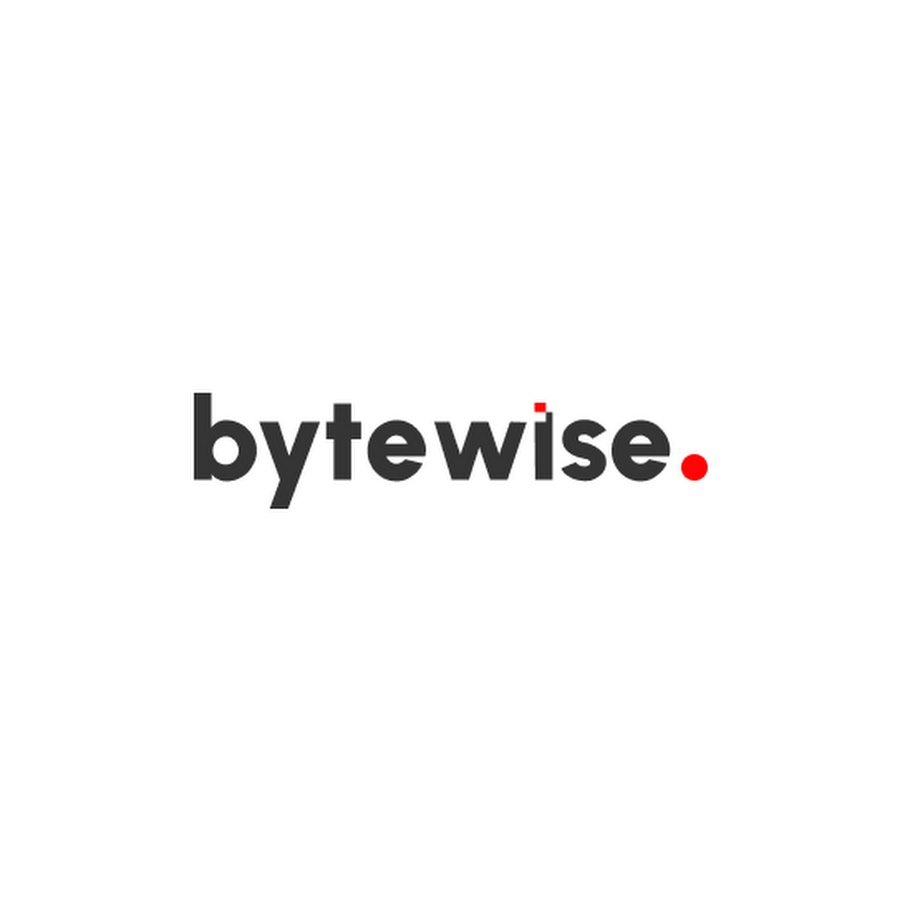

### Project Introduction

As a Bytewise Fellow specializing in "Deep Learning and Machine Learning" at Bytewise Limited, I worked on a project to improve **pneumonia detection** using **deep learning** techniques. The goal was to create a model that could accurately identify **pneumonia** from **chest X-ray images**.

### Introduction

This project focuses on building a Convolutional Neural Network (CNN) model for detecting pneumonia from chest X-ray images. Pneumonia is a significant respiratory condition, and early detection is crucial for timely treatment. With deep learning techniques, we can automate the process of classifying X-ray images into two categories: *Pneumonia* and *Normal*.

We use TensorFlow and Keras to develop a CNN model and process images using OpenCV. The dataset, which includes X-rays labeled as either Pneumonia or Normal, is preprocessed to handle varying image sizes, followed by data augmentation to address class imbalance. The goal is to achieve high classification accuracy, enabling the model to assist healthcare professionals in diagnosing pneumonia.

just run this portion, this will take data from kaggle and setup a repo, use T4 GPU for better and fast processing

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'chest-xray-pneumonia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F17810%2F23812%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240908%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240908T152002Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5dd95d36aceaaf01681e892b5f1963a2ee3e1a68ed22d8a5dd967cccf1b5200b8fff052edd877cf5ed2723f86f8b8739657d6a3a5661d1ef3f0eec0d9c7551e3af784ac532a9fb6932a7dec16b1b8f99ef8c540dca97595574c88f1fba2529b0d4dedc08287a78f09c6831f0afca7425f43483b11a435f4ba1f1dbf3575ffc7415dc02ca8e2aae116f1c1a694f19974df752b27d021eaf3f2c7f4cbb489ebe1517298bc5ba68a988dbac128a3ba1920588190869ef0fac136337b20aa9aca999f569f5127909b74165b6dbf0ebcaf9510bab11431daba9e878806a0c9478c6135e1056ecab47a03bd96a39b7e8162cc1a5ef14e41bdfb20d2bad4c1d7e94dab0'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2463365435 bytes downloaded
Downloaded and uncompressed: chest-xray-pneumonia
Data source import complete.


to show all files

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Streaming output truncated to the last 5000 lines.
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0540-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1150-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0571-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0493-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0640-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1241-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0798-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0887-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0294-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0804-0001.jpeg
/kaggle/input

### Imports

```
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
```

These imports provide the essential libraries and modules needed for this project, including TensorFlow for building and training the CNN model, OpenCV for image processing, and Matplotlib/Seaborn for visualizing the data. Additionally, Keras utilities are used for implementing data augmentation and model callbacks.

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2

### Constants

In this project, several constants are defined to standardize key parameters throughout the data processing and model training phases:

- **IMG_SIZE**: The dimensions for resizing input images, set to 150x150 pixels.
- **BATCH_SIZE**: The number of images processed in each training batch, set to 32.
- **EPOCHS**: The number of times the entire training dataset is passed through the model, set to 20.
- **LR (Learning Rate)**: The rate at which the model updates during training, set to 1e-3 (0.001).
- **Dataset Paths**: The dataset directories for training, testing, and validation are specified to ensure organized data handling.
- **LABELS**: A dictionary mapping the class labels ('Pneumonia' and 'Normal') for easy reference and visualization.

In [ ]:
# Constants
IMG_SIZE = 150
LABELS = ['PNEUMONIA', 'NORMAL']

### Data Loading and Preprocessing

The dataset is loaded from the predefined directories, and the images are resized to the specified `IMG_SIZE` (150x150 pixels). During preprocessing:

- **Image Resizing**: Each image is resized to ensure consistency in input dimensions for the model.
- **Normalization**: The pixel values of the images are scaled to a range between 0 and 1 for better model performance.
- **Label Assignment**: Each image is assigned a label corresponding to its class ('Pneumonia' or 'Normal').
- **Train-Test Split**: The dataset is split into training, validation, and test sets for model training, tuning, and evaluation.

This preprocessing ensures that the data is in the correct format for training the neural network.

In [ ]:
def get_training_data(data_dir):
    images = []
    labels = []
    for label in LABELS:
        path = os.path.join(data_dir, label)
        class_num = LABELS.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))  # Resizing images
                images.append(resized_arr)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(images), np.array(labels)

### Loading the Dataset

The dataset used in this project consists of X-ray images categorized into two classes: **Pneumonia** and **Normal**. The images are organized into separate folders for each class under the training, validation, and test directories. To load and preprocess the dataset:

- **Folder Structure**: The dataset is structured with separate directories for training, validation, and testing data.
  - `train`: Contains images for training the model.
  - `test`: Used for final model evaluation.
  - `val`: Used to tune hyperparameters and avoid overfitting.
  
- **Data Extraction**: Each image is read from its respective directory and converted into a standardized format for consistency. The corresponding label is extracted based on the folder it resides in, i.e., images in the 'Pneumonia' folder are labeled as 0, and those in the 'Normal' folder are labeled as 1.

- **Data Preprocessing**: The images are resized to a predefined size (150x150 pixels) to ensure uniform input dimensions across the dataset. Normalization is applied to the pixel values by scaling them to a range of 0-1, which helps in faster convergence of the model.

This process prepares the dataset for use in training, validating, and testing the model.

loading datasets

In [ ]:
train_images, train_labels = get_training_data('/kaggle/input/chest-xray-pneumonia/chest_xray/train')
test_images, test_labels = get_training_data('/kaggle/input/chest-xray-pneumonia/chest_xray/test')
val_images, val_labels = get_training_data('/kaggle/input/chest-xray-pneumonia/chest_xray/val')


combining taining and validation datasets

In [ ]:
all_images = np.concatenate([train_images, val_images])
all_labels = np.concatenate([train_labels, val_labels])

normalizing and reshaping data

In [ ]:
x_train = all_images / 255.0
x_val = val_images / 255.0
x_test = test_images / 255.0

x_train = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_val = x_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y_train = all_labels
y_val = val_labels
y_test = test_labels


### Data Visualization

- **Class Distribution**: Shows the number of samples per class.
- **Image Samples**: Displays example images from each class.
- **Training Curves**: Plots accuracy and loss to track model performance over epochs.

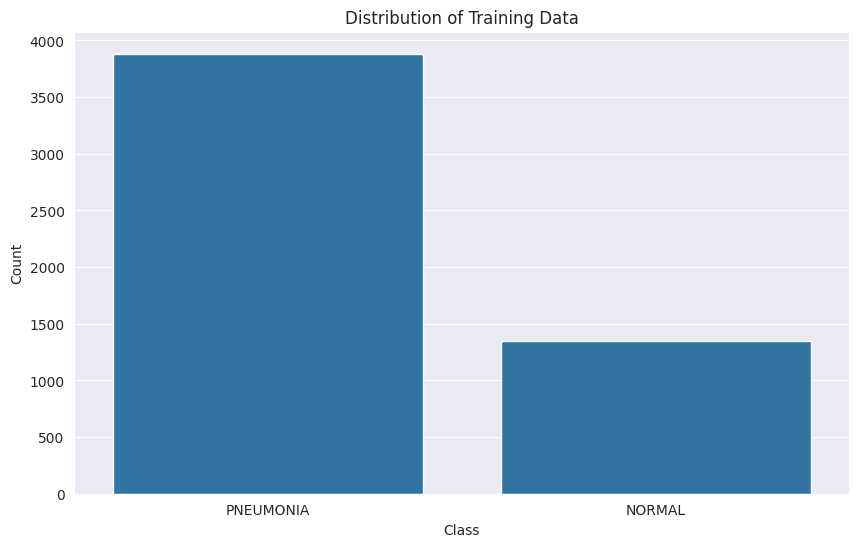

In [ ]:
label_names = ['PNEUMONIA', 'NORMAL']
label_list = [label_names[label] for label in y_train]

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(x=label_list)
plt.title('Distribution of Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Previewing Images

Display sample images from the dataset to visualize what the model is learning. This includes showing:

- **Representative Images**: Examples from both classes (e.g., 'Pneumonia' and 'Normal') to understand their characteristics.
- **Sample Visuals**: A few images to verify correct loading and preprocessing.

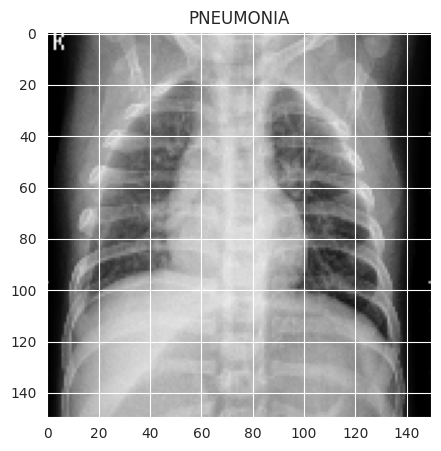

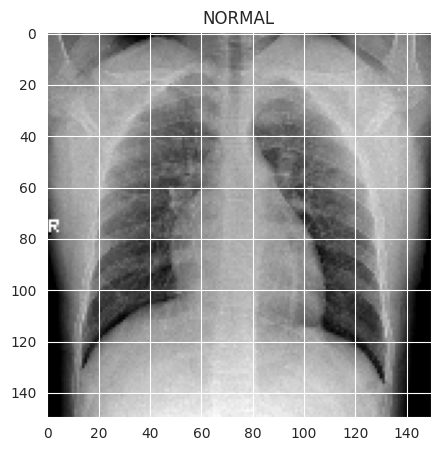

In [ ]:
# Previewing images
plt.figure(figsize=(5, 5))
plt.imshow(train_images[0], cmap='gray')
plt.title(LABELS[train_labels[0]])

plt.figure(figsize=(5, 5))
plt.imshow(train_images[-1], cmap='gray')
plt.title(LABELS[train_labels[-1]])
plt.show()

### Data Augmentation

To address dataset imbalance, **data augmentation** is used to increase training examples by applying transformations like:

- **Rotation**
- **Zooming**
- **Flipping**
- **Shifting**

These techniques help prevent overfitting and improve the model's ability to generalize by introducing slight variations in the training data.

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(x_train)

### Building the Model

The model is constructed using a Convolutional Neural Network (CNN) architecture, which is effective for image classification tasks. Key components include:

- **Convolutional Layers**: Apply filters to detect features in images.
- **MaxPooling Layers**: Reduce the spatial dimensions, helping to focus on the most important features.
- **Dropout Layers**: Prevent overfitting by randomly dropping neurons during training.
- **BatchNormalization**: Normalize the activations to improve training stability.
- **Dense Layers**: Fully connected layers that perform the final classification.

The model is compiled with the **RMSprop** optimizer and **binary crossentropy** loss function, suitable for binary classification tasks. The architecture aims to effectively extract features and classify images as either 'Pneumonia' or 'Normal'.

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding='same'),
    Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding='same'),
    Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding='same'),
    Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding='same'),
    Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 38, 38, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 19, 19, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │              

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

learning rate reduction

In [ ]:
# Learning rate reduction callback
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=0.000001)

### Learning Rate Reduction

**Learning rate reduction** adjusts the learning rate during training to improve model performance by:

- **Reducing Learning Rate**: When validation performance plateaus.
- **Enhancing Convergence**: Helps the model fine-tune weights better.

This is managed with the `ReduceLROnPlateau` callback.

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=12, validation_data=datagen.flow(x_val, y_val), callbacks=[learning_rate_reduction])


Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 45s 164ms/step - accuracy: 0.7940 - loss: 1.2411 - val_accuracy: 0.5000 - val_loss: 25.0785 - learning_rate: 0.0010
Epoch 2/12
164/164 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.8983 - loss: 0.2723 - val_accuracy: 0.5000 - val_loss: 22.3881 - learning_rate: 0.0010
Epoch 3/12
163/164 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9138 - loss: 0.2207
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
164/164 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.9139 - loss: 0.2206 - val_accuracy: 0.5000 - val_loss: 33.8708 - learning_rate: 0.0010
Epoch 4/12
164/164 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9433 - loss: 0.1536 - val_accuracy: 0.5625 - val_loss: 3.6087 - learning_rate: 3.0000e-04
Epoch 5/12
164/164 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.9567 - loss: 0.1147 - val_accuracy: 0.8750 - val_loss: 0.4388 - learning_rate: 3.0000e-04
Epoch 6/12
164/164 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.9535 - 


### Evaluating the Model

**Model evaluation** involves assessing the trained model’s performance using the test dataset:

- **Loss and Accuracy**: Compute the final loss and accuracy to gauge overall performance.
- **Classification Report**: Provides precision, recall, and F1-score for each class.
- **Confusion Matrix**: Visualizes true vs. predicted classifications to identify misclassifications.

These metrics help determine how well the model generalizes to new, unseen data.

In [ ]:
print("Loss of the model is - ", model.evaluate(x_test, y_test)[0])
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1] * 100, "%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9440 - loss: 0.1651
Loss of the model is -  0.2756490111351013
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9440 - loss: 0.1651
Accuracy of the model is -  91.98718070983887 %


### Analysis After Model Training

**Analysis** includes:

- **Performance Metrics**: Assess final loss and accuracy on the test set.
- **Training Curves**: Plot accuracy and loss for both training and validation to evaluate model performance over epochs.
- **Predictions**: Review predicted vs. actual labels using classification reports and confusion matrices.
- **Error Analysis**: Examine correctly and incorrectly predicted samples to identify areas for improvement.

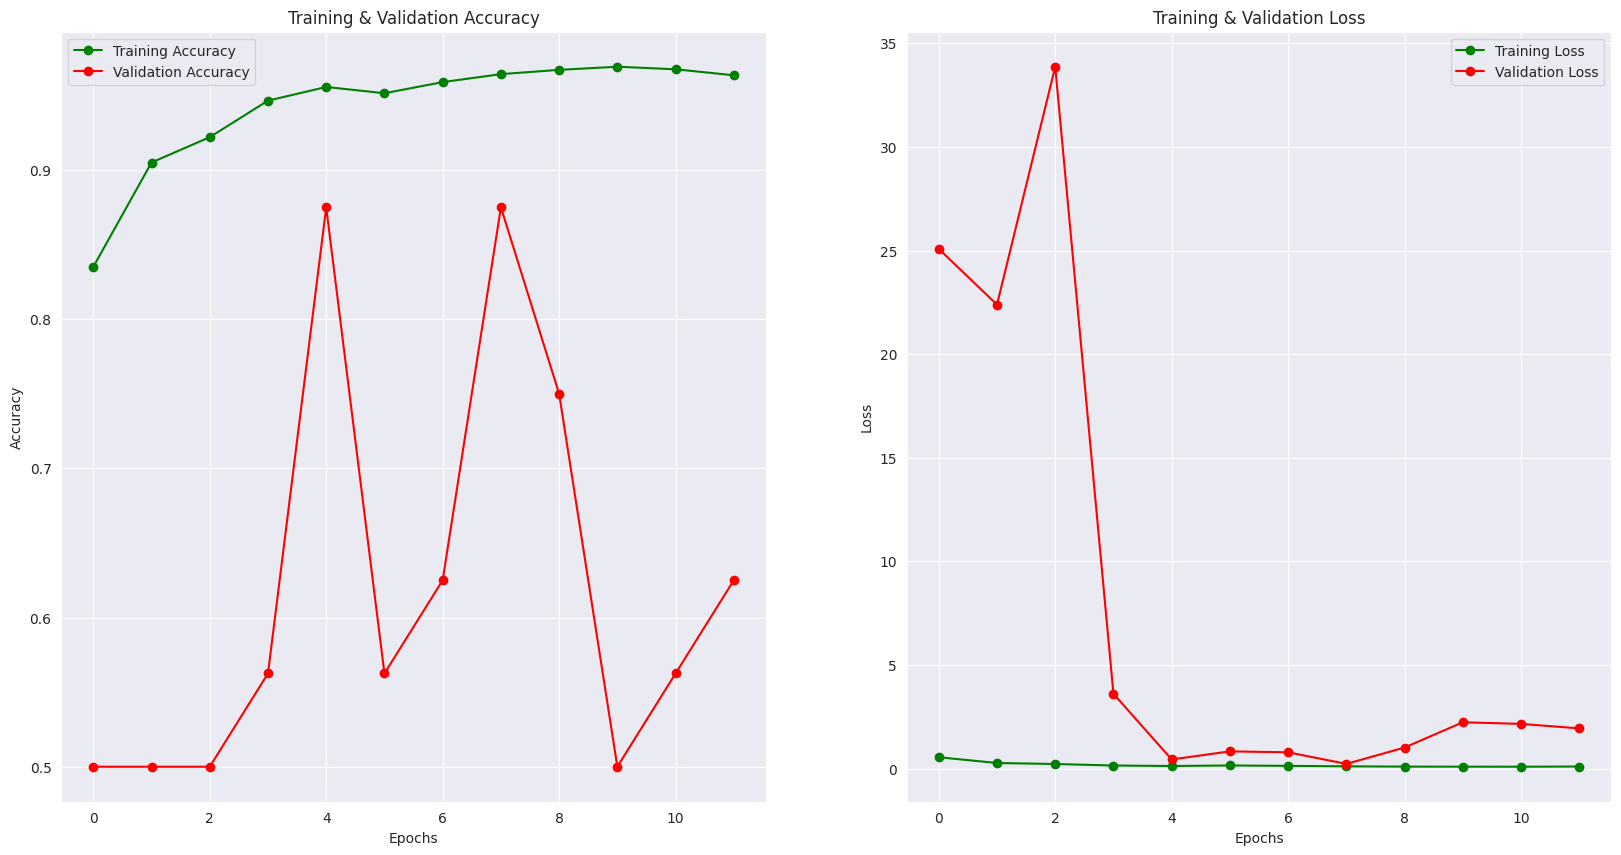

In [ ]:
# Analysis after Model Training
epochs = [i for i in range(12)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20, 10)
ax[0].plot(epochs, train_acc, 'go-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'g-o', label='Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label='Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()


### Prediction and Evaluation

- **Predictions**: Generate and inspect model predictions on test data.
- **Evaluation Metrics**: Use classification report and confusion matrix to assess performance.

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.92      0.95      0.94       390
   Normal (Class 1)       0.91      0.87      0.89       234

           accuracy                           0.92       624
          macro avg       0.92      0.91      0.91       624
       weighted avg       0.92      0.92      0.92       624



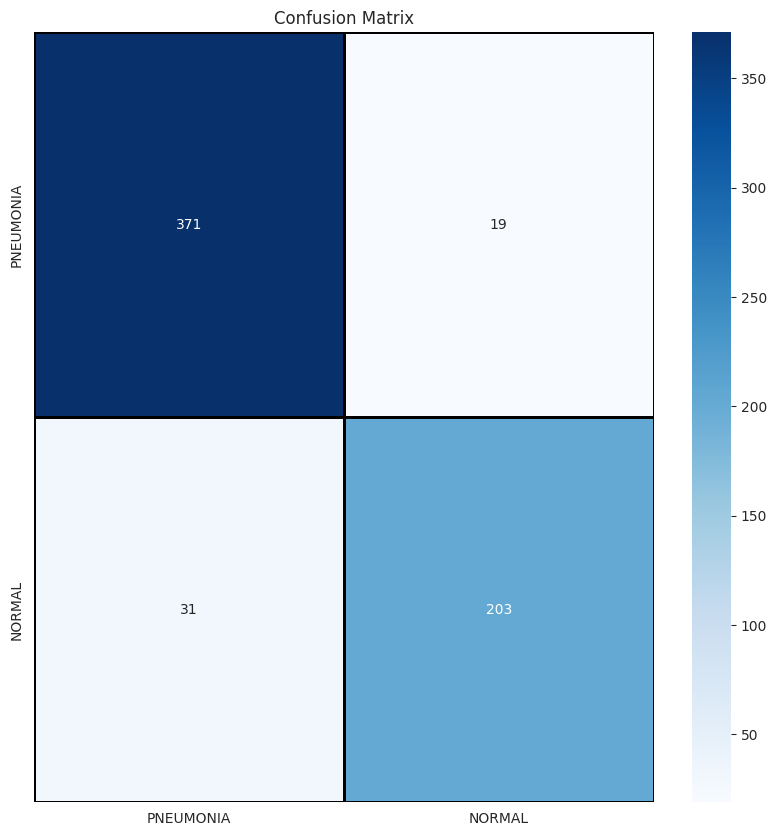

In [ ]:
# Predictions and Evaluation
predictions = model.predict(x_test)
predictions = (predictions > 0.5).astype(int).reshape(-1)

print(classification_report(y_test, predictions, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])

plt.figure(figsize=(10, 10))
sns.heatmap(cm_df, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=LABELS, yticklabels=LABELS)
plt.title('Confusion Matrix')
plt.show()

### Correct and Incorrect Predictions

- **Correct Predictions**: Display a few examples where the model correctly predicted the class.
- **Incorrect Predictions**: Show examples where the model’s prediction was wrong, highlighting areas for improvement.

In [ ]:
# Correct and Incorrect Predictions
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

### Some Correctly Predicted Classes

Display a few images where the model's predictions match the actual class, showcasing its accurate predictions.

<ipython-input-20-809872768a4d>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i + 1)


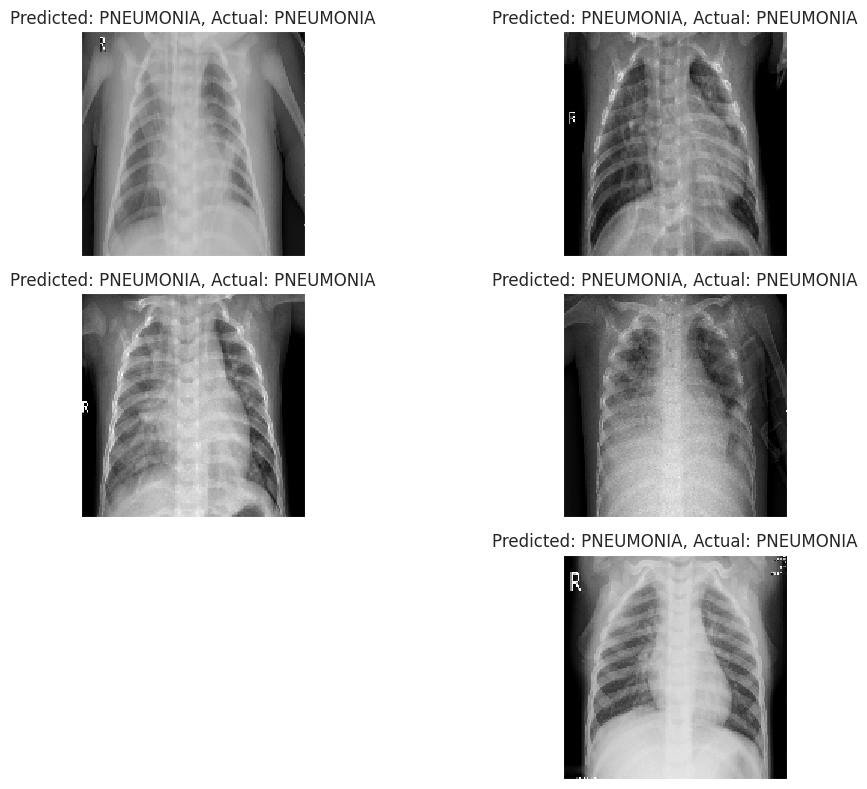

In [ ]:
# Some Correctly Predicted Classes
plt.figure(figsize=(12, 8))
for i, c in enumerate(correct[:6]):
    plt.subplot(3, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(IMG_SIZE, IMG_SIZE), cmap="gray", interpolation='none')
    plt.title(f"Predicted: {LABELS[predictions[c]]}, Actual: {LABELS[y_test[c]]}")
    plt.tight_layout()
plt.show()

### Some Incorrectly Predicted Classes

Display a few images where the model’s predictions do not match the actual class, highlighting areas where the model made errors.

<ipython-input-21-d1063fa5e55d>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i + 1)


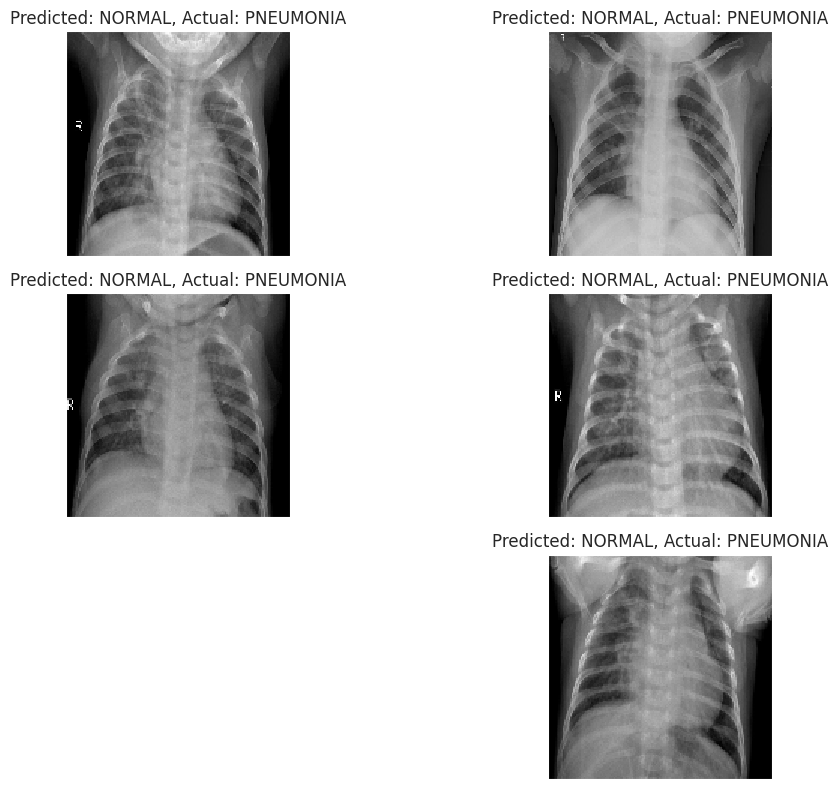

In [ ]:
# Some Incorrectly Predicted Classes
plt.figure(figsize=(12, 8))
for i, c in enumerate(incorrect[:6]):
    plt.subplot(3, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(IMG_SIZE, IMG_SIZE), cmap="gray", interpolation='none')
    plt.title(f"Predicted: {LABELS[predictions[c]]}, Actual: {LABELS[y_test[c]]}")
    plt.tight_layout()
plt.show()
